In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
import datetime
%matplotlib inline

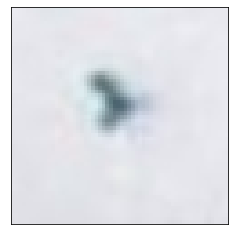

1.56
(80, 80)


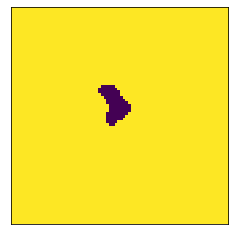

In [80]:
# 調整高斯參數
kernel_size = (3, 3)  # 高斯模糊矩陣大小
sigma = 3 # 高斯模糊標準差參數(0=自動)
# slice_img = cv2.imread("./rect/3G2_rect.jpg")  # 整體成像預覽
# img_size = (1100, 700)  # 顯示視窗大小

slice_img = cv2.imread("./rect/3G1/9-3.jpg")  # 個別成像預覽
img_size = (100, 100)  # 顯示視窗大小

plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis 
plt.imshow(slice_img[20:80, 20:80]) 
plt.show()

grayImage = cv2.cvtColor(slice_img, cv2.COLOR_BGR2GRAY)  # gray(0-255) 圖像轉換灰階
grayImage = cv2.GaussianBlur(grayImage, kernel_size, sigma)  # GaussianBlur  圖校進行模糊化(高斯)
(thresh, blackAndWhiteImage) = cv2.threshold(grayImage,  180, 255, cv2.THRESH_BINARY)  # black and white(0, 255)  圖像透過thershold閾值進行二元化 
caculateImg = blackAndWhiteImage[10:90, 10:90]
slice_percent =  round(sum(sum(caculateImg == 0))/64, 2)  # 計算黑色比例(作物占比)
print(slice_percent)
print(caculateImg.shape)
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis 
plt.imshow(caculateImg) 
plt.show()


# cv2.namedWindow("output", cv2.WINDOW_NORMAL)        # Create window with freedom of dimensions
# # blackAndWhiteImage = cv2.resize(blackAndWhiteImage, img_size)    # Resize image
# cv2.imshow("output", blackAndWhiteImage)                           # Show image
# cv2.waitKey(0)                                      # Display the image infinitely until any keypress

cv2.destroyAllWindows()

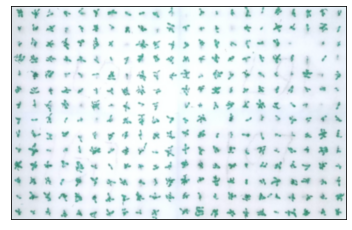

1400 2200
done


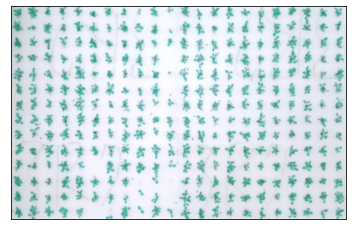

1400 2200
done


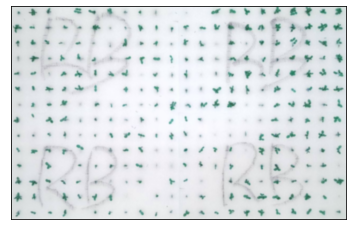

1400 2200
done


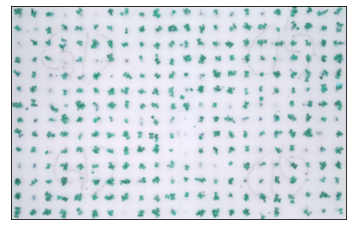

1400 2200
done


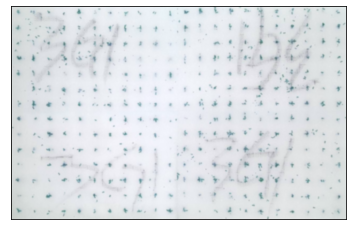

1400 2200
done


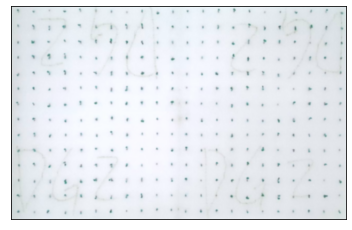

1400 2200
done


In [17]:
# 照片裁切個別另存
list1 = ['1G7','1R7','1RB','2GD','3G1', '3G2']
for series in list1:
# series = '1G7'
    img = cv2.imread("./rect/" + series+ "_rect.jpg")
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic') 
    plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis 
    # plt.plot([200,300,400],[100,200,300],'c', linewidth=5) 
    plt.show()
    x = img.shape[0]
    y = img.shape[1]
    # 裁切區域的 x 與 y 座標（左上角）
    top = 0  # 最上面(+h)
    left = 0  # 最左邊(+w)
    plus = 100
    print(x, y)
    for i in range(14):
        for j in range(22):
            slice_img = img[top:top+plus, left:left+plus]
            name = str(i)+'-'+str(j)+'.jpg'
            dirs = './rect/' + series + '/'  # 記得建資料夾(懶的自動怎樣)
            cv2.imwrite(dirs+name, slice_img)
            left = left + plus
        top = top +plus
        left = 0
    print('done')

In [2]:
# 品種參數
dict1 = {'1G1':[180, 1.4], 
        '1G4':[185, 2.0], 
        '1G7':[180, 2.1], 
        '1R7':[180, 3.0], 
        '1RB':[170, 3.0], 
        '2GD':[180, 4.0], 
        '3G1':[180, 1.5], 
        '3G2':[180, 0.8]}
dict1

{'1G1': [180, 1.4],
 '1G4': [185, 2.0],
 '1G7': [180, 2.1],
 '1R7': [180, 3.0],
 '1RB': [170, 3.0],
 '2GD': [180, 4.0],
 '3G1': [180, 1.5],
 '3G2': [180, 0.8]}

In [3]:
# 載入class確認發芽閾值
from ger import germination
series = '1G1'
filename = './rect/' + series + '_rect.jpg'
threshold = dict1[series][0]
percent = dict1[series][1]
aaa = germination(series, '2020/1/31', filename, threshold, percent)
print(aaa)

作物編號: 1G1
播種日期: 2020-01-31
判斷日期: 2020-03-24
育苗天數: 53
閾值參數: 180
判斷條件: 1.4
結果暫存清單: 共0筆數據(詳細請看self.result_list)


In [4]:
aaa.get_photo()

拍攝照片...
裁切照片


63.64

In [12]:
len(aaa.result_list[0])
aaa.result_list

[[0,
  0,
  0.0,
  0,
  array([[[223, 232, 236],
          [223, 232, 236],
          [222, 231, 235],
          ...,
          [224, 233, 237],
          [223, 232, 236],
          [223, 232, 236]],
  
         [[223, 232, 236],
          [223, 232, 236],
          [222, 231, 235],
          ...,
          [224, 233, 237],
          [223, 232, 236],
          [223, 232, 236]],
  
         [[223, 232, 236],
          [223, 232, 236],
          [222, 231, 235],
          ...,
          [224, 233, 237],
          [223, 232, 236],
          [223, 232, 236]],
  
         ...,
  
         [[222, 231, 235],
          [222, 231, 235],
          [221, 230, 234],
          ...,
          [224, 233, 237],
          [225, 234, 238],
          [225, 234, 238]],
  
         [[222, 231, 235],
          [222, 231, 235],
          [221, 230, 234],
          ...,
          [224, 233, 237],
          [224, 233, 237],
          [225, 234, 238]],
  
         [[223, 232, 236],
          [222, 231, 235],
  

0 0 0.0


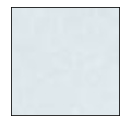

0 1 0.0


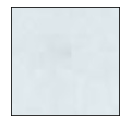

0 3 0.0


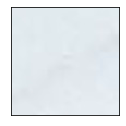

0 6 0.0


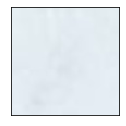

0 8 0.24


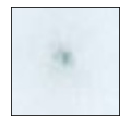

0 9 0.21


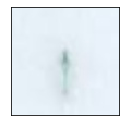

0 10 0.0


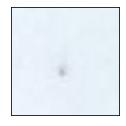

0 11 0.3


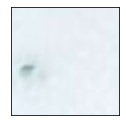

0 14 0.0


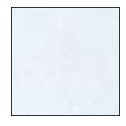

0 15 0.32


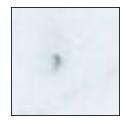

0 16 0.0


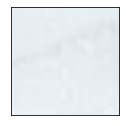

0 18 0.0


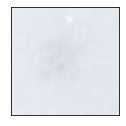

0 19 0.0


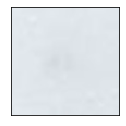

0 21 1.6


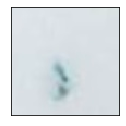

1 0 0.0


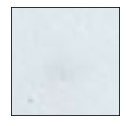

1 4 0.0


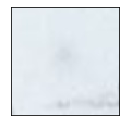

1 6 0.0


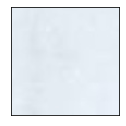

1 7 0.99


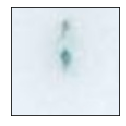

1 9 0.0


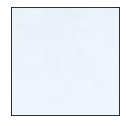

1 16 0.0


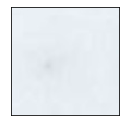

1 20 0.91


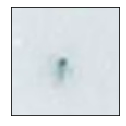

1 21 0.0


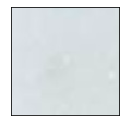

2 8 0.0


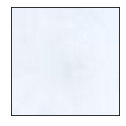

2 9 1.61


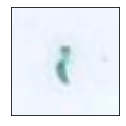

2 10 1.28


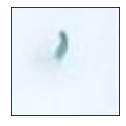

2 11 0.77


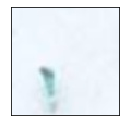

2 13 0.0


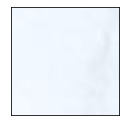

2 15 0.0


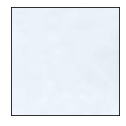

2 16 1.7


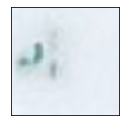

2 17 0.0


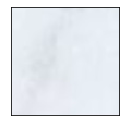

2 19 0.39


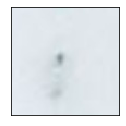

2 20 0.0


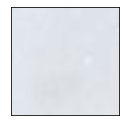

3 3 0.0


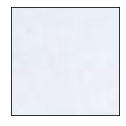

3 4 0.0


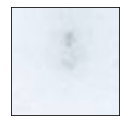

3 5 0.67


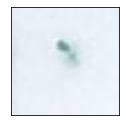

3 6 0.0


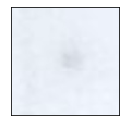

3 7 0.0


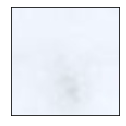

3 10 0.0


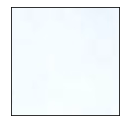

3 11 0.0


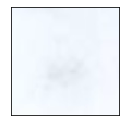

3 12 0.22


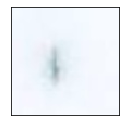

3 13 0.0


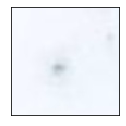

3 18 0.0


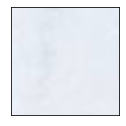

3 21 0.0


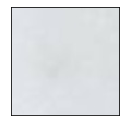

4 2 0.31


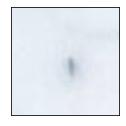

4 4 0.25


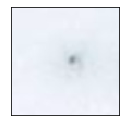

4 10 0.0


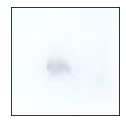

4 11 0.0


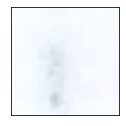

4 13 1.31


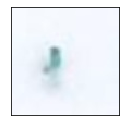

4 16 1.46


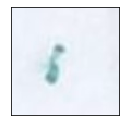

5 3 0.43


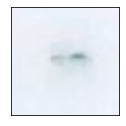

5 5 1.49


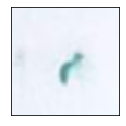

5 6 0.0


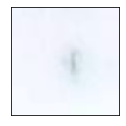

5 9 1.1


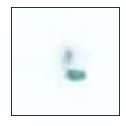

5 10 0.0


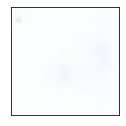

5 11 0.0


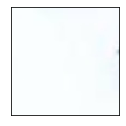

5 13 0.0


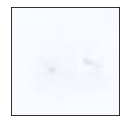

5 14 0.75


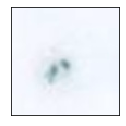

5 17 0.0


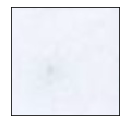

5 18 1.48


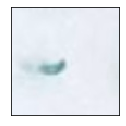

6 0 0.31


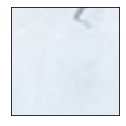

6 6 0.0


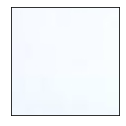

6 7 0.0


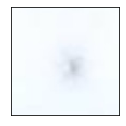

6 8 0.0


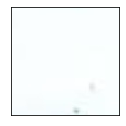

6 9 0.0


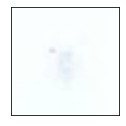

6 10 0.0


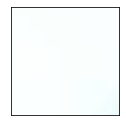

6 11 0.13


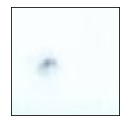

6 12 0.0


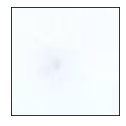

6 13 0.0


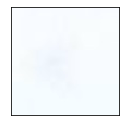

6 14 0.0


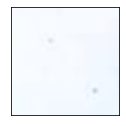

6 16 1.64


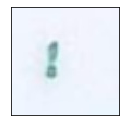

6 17 0.0


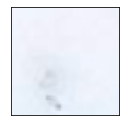

6 18 0.0


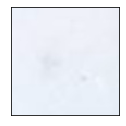

6 20 1.56


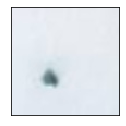

7 0 0.0


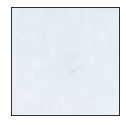

7 2 1.41


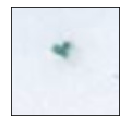

7 3 1.37


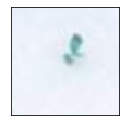

7 4 0.78


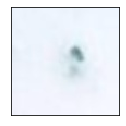

7 9 0.0


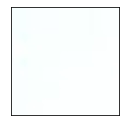

7 11 1.26


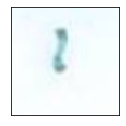

7 12 0.0


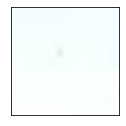

7 13 0.0


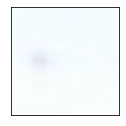

7 16 0.49


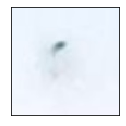

7 19 0.0


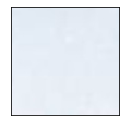

7 20 0.32


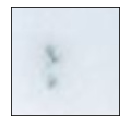

8 0 0.0


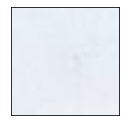

8 1 0.0


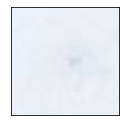

8 2 0.0


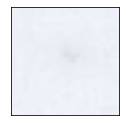

8 3 0.0


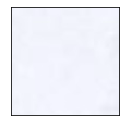

8 4 0.0


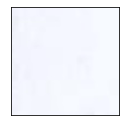

8 5 0.0


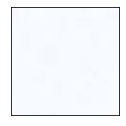

8 6 0.0


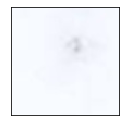

8 9 0.0


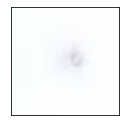

8 10 0.0


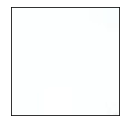

8 11 0.0


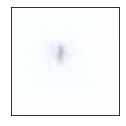

8 12 0.0


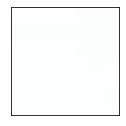

8 13 0.97


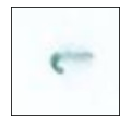

8 14 0.0


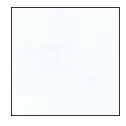

8 15 1.1


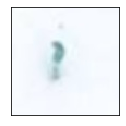

8 20 0.0


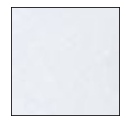

9 0 0.0


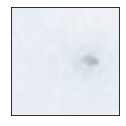

9 1 0.0


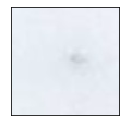

9 3 0.0


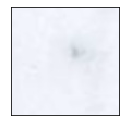

9 4 0.0


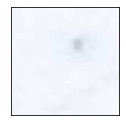

9 8 0.0


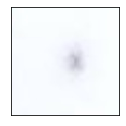

9 9 0.25


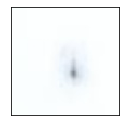

9 10 0.0


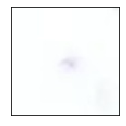

9 11 0.0


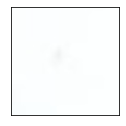

9 12 0.65


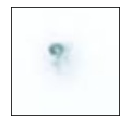

9 16 0.0


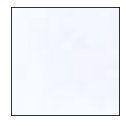

9 18 0.0


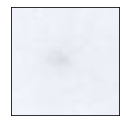

9 21 0.5


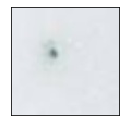

10 1 0.57


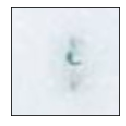

10 5 0.1


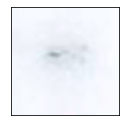

10 6 0.0


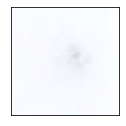

10 10 0.19


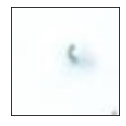

10 11 1.0


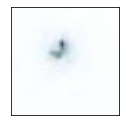

10 12 1.75


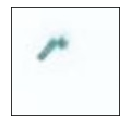

10 16 0.0


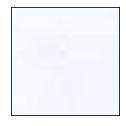

10 18 0.27


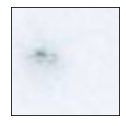

10 19 0.0


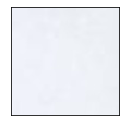

10 20 0.25


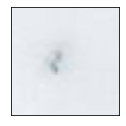

10 21 0.0


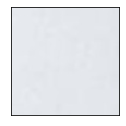

11 0 0.98


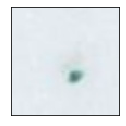

11 3 1.39


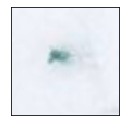

11 7 1.58


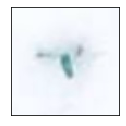

11 10 1.62


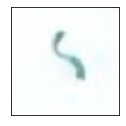

11 12 0.56


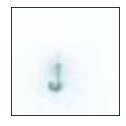

11 13 0.0


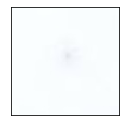

11 15 1.2


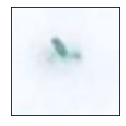

11 20 0.0


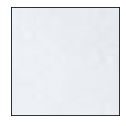

12 10 0.0


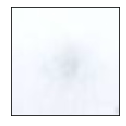

12 11 1.36


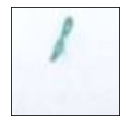

12 13 0.0


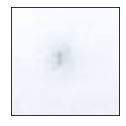

12 16 1.44


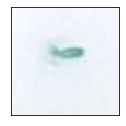

12 18 0.92


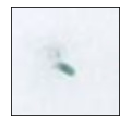

12 21 0.0


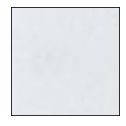

13 3 0.0


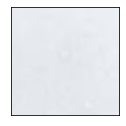

13 4 0.0


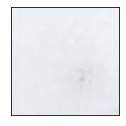

13 5 1.71


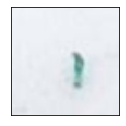

13 8 0.05


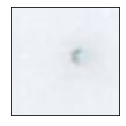

13 14 1.68


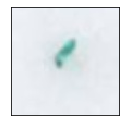

13 19 1.62


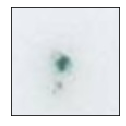

13 20 0.0


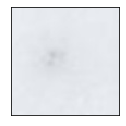

In [69]:
# 確認閾值下照片的發芽情況
bad = []
width = 10
height = len(aaa.result_list) // width + 1


# n = 0
for i in aaa.result_list:
    if i[2] < percent:
#         plt.subplot(height, width, n+1)
        print(i[0], i[1], i[2])
        plt.figure(figsize=(2, 2))
        plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis 
        plt.imshow(i[4])
        plt.show()
#         n = n + 1
        bad.append(i)
# bad


In [15]:
height = len(aaa.result_list) // width + 1
height

29